<a href="https://colab.research.google.com/github/tya2aa2/melani/blob/main/Summaryall_TYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ADHITYA MELANI EKA JANARWATI
CONCLUSIONS:

Tuberculosis (TB) is a disease resulting from a bacterial infection caused by Mycobacterium tuberculosis (MTB), posing a significant global health challenge due to its status as one of the leading causes of death, particularly among individuals co-infected with HIV. There are 1.7 deaths per 100,000 due to HIV/TB co-infection. Early detection methods for TB, such as the Xpert MTB/RIF test, still suffer from low sensitivity, leading to inconsistent diagnoses in various cases. This underscores the need for improved automatic MTB detection methods in TB patients, with a particular focus on those co-infected with HIV/TB. This study aims to implement the camel algorithm to identify features in creating predictive models and three ensemble methods: Random Forest (RF), Adaptive Boosting (AdaBoost), and Extreme Gradient Boosting (XGBoost) to identify TB specifically in HIV patients. Hyperparameter tuning is conducted to enhance the model's performance. Based on our findings, the model developed using the XGBoost method outperformed other models, with accuracy and F1-Score values of 0.89 and 0.75, respectively.

In [ ]:
!pip install joblib
!pip install matplotlib seaborn scikit-learn pandas numpy

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import joblib
import matplotlib.pyplot as plt


drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/TA/Data/'

Mounted at /content/drive


In [ ]:
x_train = pd.read_csv("{}/dt_x.csv".format(path))
y_train = pd.read_csv("{}/dt_y.csv".format(path))

In [ ]:
x_train

,ILMN_1651496,ILMN_1652199,ILMN_1652431,ILMN_1653466,ILMN_1656011,ILMN_1657871,ILMN_1658247,ILMN_1658494,ILMN_1659688,ILMN_1661266,...,ILMN_3243644,ILMN_3246805,ILMN_3249578,ILMN_3251587,ILMN_3251658,ILMN_3285762,ILMN_3302919,ILMN_3305475,ILMN_3308138,ILMN_3309453
0,9.868381,11.647395,10.536956,10.241554,11.883285,9.099485,9.791083,11.319762,8.558027,9.870231,...,12.319923,9.947460,9.571497,9.677040,11.362848,9.623863,11.262811,11.206581,9.177596,9.149773
1,8.988827,10.507101,7.749172,10.951853,12.891899,8.735664,9.622513,13.998273,9.105204,8.747374,...,11.962979,10.338280,10.201744,10.592317,10.458058,8.182504,11.642693,12.862349,9.410704,9.551026
2,9.372978,11.511748,8.282922,11.309158,11.342541,9.782454,8.273772,13.049103,9.050529,10.251246,...,12.967876,11.495920,11.610771,11.650060,10.634493,8.183025,10.485356,10.704837,10.664278,10.724642
3,9.288905,10.656461,7.436720,12.422567,13.094759,10.023283,8.601429,13.885611,8.660459,11.312361,...,12.678697,11.132641,11.169837,11.161170,10.982815,7.959208,10.755438,12.688292,10.691491,10.618991
4,10.994566,9.957029,8.906359,10.614443,11.364589,9.400862,8.634684,13.102735,8.308016,11.194049,...,11.726184,10.311816,10.244090,10.578458,10.955744,8.544501,11.198654,13.378972,9.741816,9.676657
5,9.061101,9.999591,7.384361,11.604530,12.843474,8.518720,9.132243,12.858146,8.239446,9.782454,...,13.307058,11.483685,11.687262,11.671515,7.752548,7.986991,10.366104,10.261355,10.869239,10.667156
6,9.594196,11.076047,7.844072,11.786939,12.549419,9.024832,8.853459,13.493530,8.442637,10.666286,...,12.736444,11.093061,11.165724,10.835316,9.983421,8.126534,10.139679,10.902752,10.648897,10.265005
7,9.236292,9.509197,7.817578,11.497293,11.926730,10.575180,8.512108,14.200669,10.360298,8.509252,...,11.567524,10.355946,10.338926,10.601037,11.765025,7.862365,12.359165,12.961853,9.912014,9.971457
8,9.518425,10.779900,6.905315,12.216237,12.906842,8.743020,8.187317,13.704109,7.725434,11.087509,...,13.607192,11.092889,11.174832,11.457396,10.093576,7.494192,10.112035,13.104163,10.535645,10.426537
9,9.120080,13.281805,10.512819,10.994834,12.354434,8.847393,9.446622,14.264641,8.975991,8.310467,...,10.346203,9.046843,8.666164,9.712140,11.197598,10.042124,10.971572,10.691517,8.759762,8.016758


In [ ]:
y_train.shape

(35, 1)

In [ ]:
dttest = pd.read_csv("{}/data_test.csv".format(path))
x_test = dttest.drop('Type', axis = 1)
x_test

,ILMN_1343295,ILMN_1651228,ILMN_1651229,ILMN_1651237,ILMN_1651254,ILMN_1651262,ILMN_1651278,ILMN_1651296,ILMN_1651315,ILMN_1651316,...,ILMN_3309694,ILMN_3309739,ILMN_3309759,ILMN_3309975,ILMN_3310035,ILMN_3310326,ILMN_3310351,ILMN_3310491,ILMN_3310840,ILMN_3311190
0,12.735446,14.299194,9.063012,8.156968,11.955639,12.117659,11.034545,9.471716,11.114783,11.771481,...,8.223278,8.808089,8.253370,8.712850,8.463765,8.754721,11.289794,12.926357,8.263241,7.866327
1,12.917104,14.311344,8.914412,8.088094,11.634716,12.133460,11.541992,9.294412,11.367699,11.888770,...,8.772209,9.145484,7.994738,8.965980,8.699625,8.838788,11.218587,13.296314,8.173727,8.436632
2,13.457483,13.872973,8.963905,7.619376,12.675218,12.304656,10.861948,9.110966,11.332753,11.897290,...,8.543430,9.221285,8.081052,8.786890,8.495979,9.509197,11.339215,13.277513,9.183730,8.435024
3,12.283745,14.456695,9.001889,8.443992,12.018012,12.397544,11.311839,9.526904,11.296182,12.272119,...,8.824761,9.140567,8.707476,8.800893,9.088518,8.742394,11.282457,13.805008,8.471208,8.489202
4,12.586375,14.438519,8.725567,7.853210,12.349478,12.009871,10.873313,9.718045,11.348656,12.735446,...,8.497740,9.141706,8.433548,8.723664,9.080857,9.538484,11.158635,13.974809,9.246489,8.165605
5,13.591966,14.321872,9.127891,8.825735,11.339889,12.535980,10.747413,9.371260,11.719153,11.899784,...,8.098274,8.897588,8.381668,8.481493,8.324464,9.173510,11.169837,13.016986,8.545887,8.428812
6,12.875596,14.712436,8.988906,8.228001,12.332932,12.280519,10.834534,9.058660,11.332339,12.007224,...,8.336435,8.800774,8.376681,8.487957,8.977623,8.685208,10.795350,13.693400,8.753798,8.288119
7,12.393018,14.749084,9.105204,7.956132,11.781405,12.186922,11.158925,9.233155,11.130326,13.133993,...,8.240648,8.947216,8.094537,8.773327,8.995417,9.386636,11.904868,13.425111,8.696623,8.269833
8,12.664641,14.568989,9.059277,7.728648,11.802940,12.216485,11.007658,9.452297,11.360770,12.705090,...,8.406588,9.111962,8.398962,8.649536,9.184226,9.176423,11.532614,13.205132,9.345070,7.988077


In [ ]:
x_test.shape

(9, 15529)

In [ ]:
y_test = dttest.iloc[:,[-1]]
y_test

,Type
0,1
1,0
2,1
3,0
4,0
5,1
6,1
7,0
8,0


In [ ]:
y_test = np.array(y_test)
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
y_train = np.array(y_train)
y_train

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

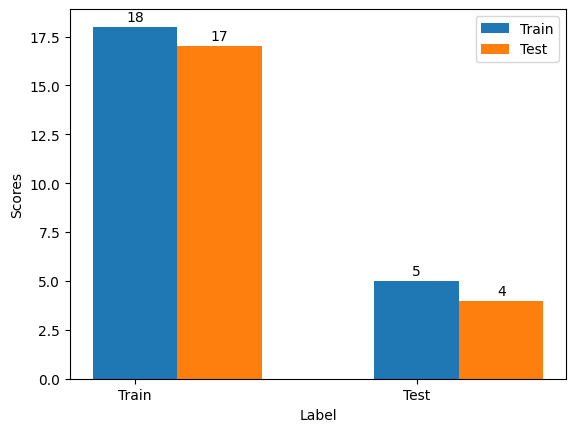

In [ ]:
hiv_train = np.sum(y_train == 0)
hivtb_train = np.sum(y_train == 1)
hiv_test = np.sum(y_test == 0)
hivtb_test = np.sum(y_test == 1)

#set position
position = np.arange(2)
width = 0.30

#ploting the bar chart
fig, ax = plt.subplots()

train_bars = ax.bar(position, [hiv_train , hiv_test ], width, label='Train')
test_bars = ax.bar(position + width, [hivtb_train, hivtb_test], width, label='Test')

#adding the data labels above the bars
ax.bar_label(train_bars, padding = 2)
ax.bar_label(test_bars, padding = 2)

#setting the label and title
ax.set_ylabel('Scores')
ax.set_xlabel('Label')
ax.set_xticks(position)
ax.set_xticklabels(['Train', 'Test'])
ax.legend()

plt.show()

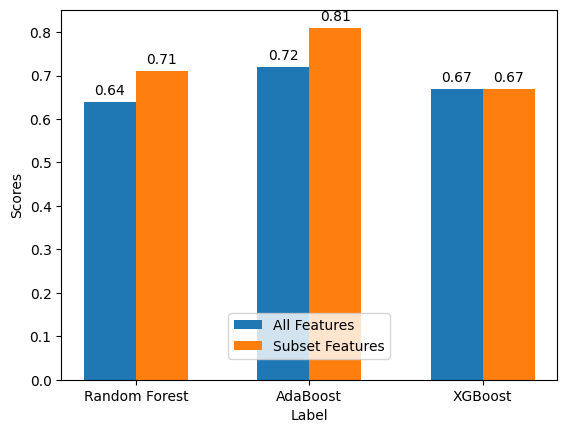

In [ ]:
#MENAMPILKAN AKURASI FEATURES SELEKSI
import numpy as np
import matplotlib.pyplot as plt

# FEATURES SELECTION
All_Features_accuracyRF = 0.64
Subset_Features_accuracyRF = 0.71
All_Features_accuracyAB = 0.72
Subset_Features_accuracyAB = 0.81
All_Features_accuracyXGB = 0.67
Subset_Features_accuracyXGB = 0.67

# set position
position = np.arange(3)
width = 0.30  # Adjusted width for better visualization

# plotting the bar chart
fig, ax = plt.subplots()

random_bars = ax.bar(position, [All_Features_accuracyRF, All_Features_accuracyAB, All_Features_accuracyXGB], width, label='All Features')
ada_bars = ax.bar(position + width, [Subset_Features_accuracyRF, Subset_Features_accuracyAB, Subset_Features_accuracyXGB], width, label='Subset Features')

# adding the data labels above the bars
ax.bar_label(random_bars, padding=3)
ax.bar_label(ada_bars, padding=3)

# setting the label and title
ax.set_ylabel('Scores')
ax.set_xlabel('Label')
ax.set_xticks(position + width / 2)  # Centering the x-ticks between bars
ax.set_xticklabels(['Random Forest', 'AdaBoost', 'XGBoost'])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2), ncol=1)  # Placing legend below the chart

plt.show()


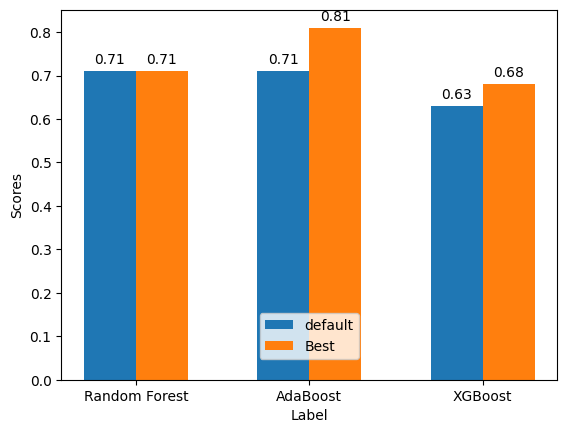

In [ ]:
#MENAMPILKAN AKURASI HYPERPARAM
import numpy as np
import matplotlib.pyplot as plt

# FEATURES SELECTION
param_defaultRF = 0.71
param_bestRF = 0.71
param_defaultAB = 0.71
param_bestAB = 0.81
param_defaultXGB = 0.63
param_bestXGB = 0.68

# set position
position = np.arange(3)
width = 0.30  # Adjusted width for better visualization

# plotting the bar chart
fig, ax = plt.subplots()

random_bars = ax.bar(position, [param_defaultRF, param_defaultAB, param_defaultXGB], width, label='default')
ada_bars = ax.bar(position + width, [param_bestRF, param_bestAB, param_bestXGB], width, label='Best')

# adding the data labels above the bars
ax.bar_label(random_bars, padding=3)
ax.bar_label(ada_bars, padding=3)

# setting the label and title
ax.set_ylabel('Scores')
ax.set_xlabel('Label')
ax.set_xticks(position + width / 2)  # Centering the x-ticks between bars
ax.set_xticklabels(['Random Forest', 'AdaBoost', 'XGBoost'])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2), ncol=1)  # Placing legend below the chart

plt.show()


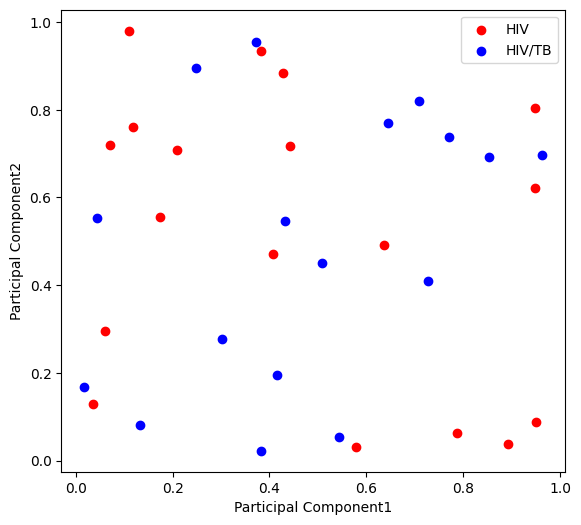

In [ ]:
# Example data
y_train = {'x': np.random.rand(35), 'y': np.random.rand(35), 'Type': np.random.choice([0, 1], size=35)}

# Creating a DataFrame
df = pd.DataFrame(y_train)

# Filter the data based on the label
label_0 = df[df['Type'] == 0]
label_1 = df[df['Type'] == 1]

# Create a scatter plot
plt.figure(figsize=(6.5, 6))

# Plot the label 0 points in red
plt.scatter(label_0['x'], label_0['y'], c='red', label='HIV')

# Plot the label 1 points in blue
plt.scatter(label_1['x'], label_1['y'], c='blue', label='HIV/TB')

# Optional: Set the title and labels
plt.xlabel('Participal Component1')
plt.ylabel('Participal Component2')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
y_train

{'x': array([0.35957111, 0.29055504, 0.86850879, 0.1747443 , 0.32986358,
        0.980739  , 0.94803742, 0.89946298, 0.16285572, 0.22370177,
        0.99439487, 0.23457552, 0.13043697, 0.16449399, 0.91018215,
        0.18243196, 0.74136725, 0.96792293, 0.04951546, 0.51098881,
        0.86879189, 0.81175656, 0.25609028, 0.07698243, 0.73544201,
        0.21784739, 0.24226176, 0.27067208, 0.55107601, 0.70890236,
        0.10262193, 0.51837988, 0.91965273, 0.12968443, 0.47836822]),
 'y': array([0.26651683, 0.99678381, 0.41836116, 0.34737188, 0.00761972,
        0.47682968, 0.16595826, 0.21899876, 0.08869958, 0.3818566 ,
        0.33040696, 0.05128976, 0.35041015, 0.85501584, 0.96814636,
        0.82508511, 0.9687249 , 0.14524606, 0.09410942, 0.88398047,
        0.04089301, 0.62527236, 0.71257692, 0.68233581, 0.48430972,
        0.21875025, 0.67780756, 0.66264678, 0.30667565, 0.71760905,
        0.88517582, 0.82104458, 0.68354294, 0.54199387, 0.67173151]),
 'Type': array([0, 0, 1, 1, 0, 1, 

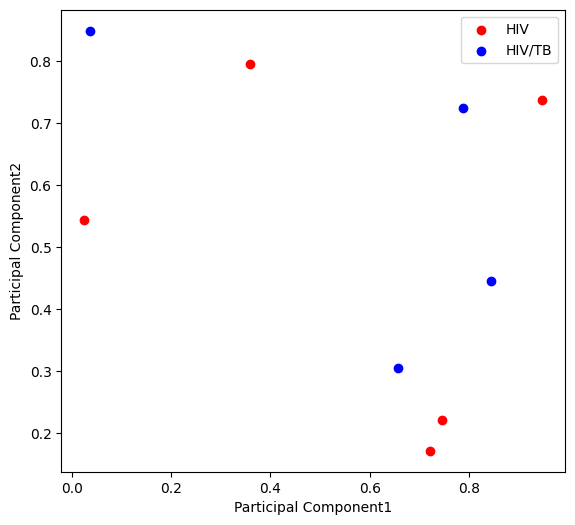

In [ ]:
# Example data
y_test = {'x': np.random.rand(9), 'y': np.random.rand(9), 'Type': np.random.choice([0, 1], size=9)}

# Creating a DataFrame
df = pd.DataFrame(y_test )

# Filter the data based on the label
label_0 = df[df['Type'] == 0]
label_1 = df[df['Type'] == 1]

# Create a scatter plot
plt.figure(figsize=(6.5, 6))

# Plot the label 0 points in red
plt.scatter(label_0['x'], label_0['y'], c='red', label='HIV')

# Plot the label 1 points in blue
plt.scatter(label_1['x'], label_1['y'], c='blue', label='HIV/TB')

# Optional: Set the title and labels
plt.xlabel('Participal Component1')
plt.ylabel('Participal Component2')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
y_train

{'x': array([0.29677671, 0.19158244, 0.5789539 , 0.47307005, 0.35843096,
        0.74442732, 0.12472973, 0.43223573, 0.14213476, 0.78289317,
        0.55770323, 0.34049931, 0.04211785, 0.49558012, 0.96699583,
        0.76599833, 0.30841499, 0.09282143, 0.21756525, 0.2924597 ,
        0.58091064, 0.07483162, 0.79069005, 0.70635354, 0.52021148,
        0.61655908, 0.02068386, 0.99267958, 0.37019529, 0.88240467,
        0.82979388, 0.03712422, 0.18425175, 0.3273261 , 0.94867237]),
 'y': array([0.61325601, 0.395931  , 0.88265422, 0.72733584, 0.58311184,
        0.15888146, 0.02391292, 0.46002901, 0.42099892, 0.60475674,
        0.54213452, 0.93037485, 0.04228947, 0.71876563, 0.75391929,
        0.23478567, 0.57731836, 0.05915258, 0.70268907, 0.29151204,
        0.81539697, 0.30810963, 0.91566304, 0.40151822, 0.93171845,
        0.58386056, 0.36928334, 0.30860756, 0.01626503, 0.29058523,
        0.80350973, 0.18257281, 0.88774476, 0.42255948, 0.9609408 ]),
 'Type': array([0, 0, 0, 1, 1, 0, 

In [ ]:
y_test

{'x': array([0.87807092, 0.27405835, 0.65188877, 0.84294686, 0.22121314,
        0.79632629, 0.30592722, 0.18104645, 0.68281992]),
 'y': array([0.82441104, 0.46749548, 0.79212022, 0.59320415, 0.07642066,
        0.50528584, 0.44820529, 0.09792032, 0.71352182]),
 'Type': array([1, 1, 0, 0, 0, 0, 1, 0, 1])}

In [ ]:
convergence_rf = joblib.load("{}/convergence_dataRF.pkl".format(path))
convergence_ab = joblib.load("{}/convergence_dataAB.pkl".format(path))
convergence_xgb = joblib.load("{}/convergence_dataXGB.pkl".format(path))

In [ ]:
convergence_rf1 = convergence_rf[0]
convergence_rf2 = convergence_rf[1]
convergence_ab1 = convergence_ab[0]
convergence_ab2 = convergence_ab[1]
convergence_xgb1  = convergence_xgb[0]
convergence_xgb2 = convergence_xgb[1]

In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_rf2)

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.019727706331109318


In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_ab[1])

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.0003655954839974795


In [ ]:
# Calculating the standard deviation
std_deviation = np.std(convergence_ab[1])

print(f"The standard deviation is: {std_deviation}")

The standard deviation is: 0.0003655954839974795


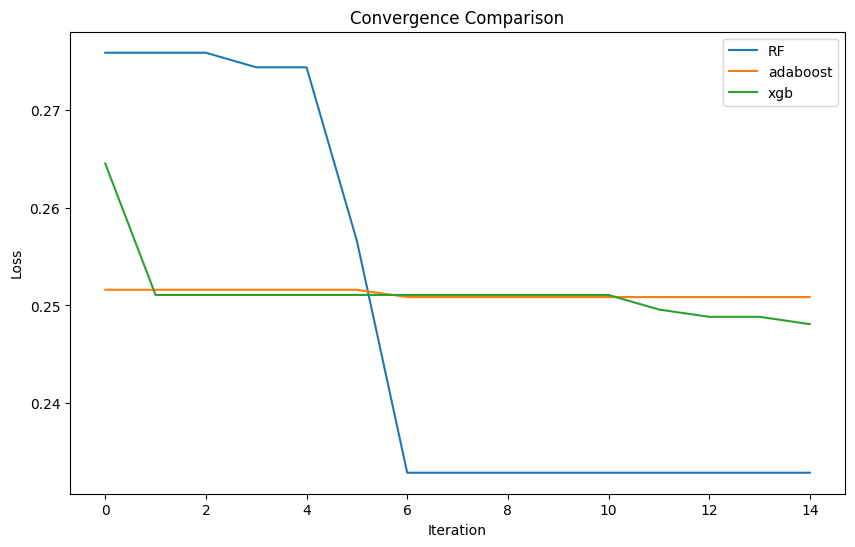

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(convergence_rf1, convergence_rf2, label='RF')
plt.plot(convergence_ab1, convergence_ab2, label='adaboost')
plt.plot(convergence_xgb1, convergence_xgb2, label='xgb')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(False)

# Save the plot as a JPG file
# plt.savefig("{}/convergence_featureselection_plot.jpg".format(path))

plt.show()


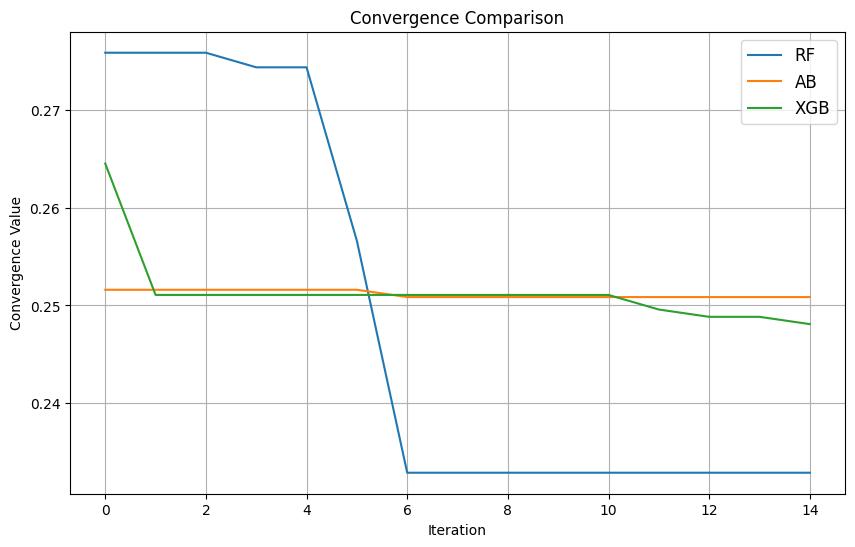

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(convergence_rf1, convergence_rf2, label='RF')
plt.plot(convergence_ab1, convergence_ab2 , label='AB')
plt.plot(convergence_xgb1, convergence_xgb2, label='XGB')

plt.xlabel('Iteration')
plt.ylabel('Convergence Value')
plt.title('Convergence Comparison')
plt.legend(fontsize='large')  # Mengatur ukuran font untuk legenda
plt.grid(True)
plt.show()


In [ ]:
grafik confusion matrix, oerbandingan seleksi features.
